# Getting list of the cities

In [3]:
import pandas as pd
import re

We will use the [Geonames](http://www.geonames.org/) database for list of all cities. 

We will start big with every city with population of more than 500 inhabitants.

In [4]:
cities500 = pd.read_csv('data/cities500.txt', 
                        sep='\t', 
                        header=None, 
                        engine='python', 
                        encoding='utf-8')

In [5]:
col_names = [
    'geonameid',
    'name',
    'asciiname',
    'alternatenames',
    'latitude',
    'longitude',
    'feature class',
    'feature code',
    'country code',
    'cc2',
    'admin1 code',
    'admin2 code',
    'admin3 code',
    'admin 4 code',
    'population',
    'elevation',
    'dem',
    'timezone',
    'modification date'
]

In [6]:
cities500.columns = col_names

In [7]:
cities500.head()

,geonameid,name,asciiname,alternatenames,latitude,longitude,feature class,feature code,country code,cc2,admin1 code,admin2 code,admin3 code,admin 4 code,population,elevation,dem,timezone,modification date
0,3038999,Soldeu,Soldeu,NaN,42.57688,1.66769,P,PPL,AD,NaN,02,NaN,NaN,NaN,602,NaN,1832,Europe/Andorra,2017-11-06
1,3039154,El Tarter,El Tarter,"Ehl Tarter,Эл Тартер",42.57952,1.65362,P,PPL,AD,NaN,02,NaN,NaN,NaN,1052,NaN,1721,Europe/Andorra,2012-11-03
2,3039163,Sant Julià de Lòria,Sant Julia de Loria,"San Julia,San Julià,Sant Julia de Loria,Sant J...",42.46372,1.49129,P,PPLA,AD,NaN,06,NaN,NaN,NaN,8022,NaN,921,Europe/Andorra,2013-11-23
3,3039604,Pas de la Casa,Pas de la Casa,"Pas de la Kasa,Пас де ла Каса",42.54277,1.73361,P,PPL,AD,NaN,03,NaN,NaN,NaN,2363,2050.0,2106,Europe/Andorra,2008-06-09
4,3039678,Ordino,Ordino,"Ordino,ao er di nuo,orudino jiao qu,Ордино,オルデ...",42.55623,1.53319,P,PPLA,AD,NaN,05,NaN,NaN,NaN,3066,NaN,1296,Europe/Andorra,2018-10-26


In [8]:
cities500.sort_values(by='population', ascending =False).head(20)

,geonameid,name,asciiname,alternatenames,latitude,longitude,feature class,feature code,country code,cc2,admin1 code,admin2 code,admin3 code,admin 4 code,population,elevation,dem,timezone,modification date
21225,1796236,Shanghai,Shanghai,"SHA,San'nkae,Sanchajus,Sangaj,Sangay,Sanghaj,S...",31.22222,121.45806,P,PPLA,CN,NaN,23,NaN,NaN,NaN,22315474,NaN,12,Asia/Shanghai,2017-07-27
166458,745044,Istanbul,Istanbul,"Bizanc,Bizánc,Byzance,Byzantion,Byzantium,Byza...",41.01384,28.94966,P,PPLA,TR,NaN,34,NaN,NaN,NaN,14804116,NaN,39,Europe/Istanbul,2017-09-26
1358,3435910,Buenos Aires,Buenos Aires,"BUE,Baires,Bonaero,Bonaeropolis,Bonaëropolis,B...",-34.61315,-58.37723,P,PPLC,AR,NaN,07,NaN,NaN,NaN,13076300,NaN,31,America/Argentina/Buenos_Aires,2019-09-05
96210,1275339,Mumbai,Mumbai,"Asumumbay,BOM,Bombai,Bombaim,Bombaj,Bombay,Bom...",19.07283,72.88261,P,PPLA,IN,NaN,16,NaN,NaN,NaN,12691836,NaN,8,Asia/Kolkata,2019-09-05
117395,3530597,Mexico City,Mexico City,"Cidade de Mexico,Cidade de México,Cidade do Me...",19.42847,-99.12766,P,PPLC,MX,NaN,09,NaN,NaN,NaN,12294193,NaN,2240,America/Mexico_City,2019-03-15
25111,1816670,Beijing,Beijing,"BJS,Bac Kinh,Baek-ging,Baekging,Behehzhin,Beij...",39.90750,116.39723,P,PPLC,CN,NaN,22,NaN,NaN,NaN,11716620,NaN,49,Asia/Shanghai,2019-09-05
142176,1174872,Karachi,Karachi,"Carachi,KHI,Karaaji,Karaces,Karachi,Karachi - ...",24.86080,67.01040,P,PPLA,PK,NaN,05,1174870,NaN,NaN,11624219,NaN,8,Asia/Karachi,2019-09-05
20560,1792947,Tianjin,Tianjin,"T'ien-chin,T'ien-ching,T'ien-ching-shih,TSN,Tc...",39.14222,117.17667,P,PPLA,CN,NaN,28,NaN,NaN,NaN,11090314,NaN,11,Asia/Shanghai,2017-06-29
23839,1809858,Guangzhou,Guangzhou,"CAN,Cantao,Canton,Cantão,Cantón,Fan-yu,Fan-yü,...",23.11667,113.25000,P,PPLA,CN,NaN,30,NaN,NaN,NaN,11071424,NaN,15,Asia/Shanghai,2017-06-20
95992,1273294,Delhi,Delhi,"DEL,Daehli,Dehli,Dehlī,Delchi,Delhi,Delhio,Del...",28.65195,77.23149,P,PPLA,IN,NaN,07,NaN,NaN,NaN,10927986,NaN,227,Asia/Kolkata,2019-09-05


In [9]:
cities = set(cities500['name'])

# Getting the book

In [10]:
visited = []
with open('data/around_the_world_in_eighty_days.txt', 'r', encoding='utf-8') as file:
    for line in file:
        for word in line.split(' '):
            word = re.sub('[^\w]', '', word)  # Remove unnecessary characters
            if word in cities:
                visited.append(word)

In [11]:
visited = list(dict.fromkeys(visited))  # Remove duplicated remaining the order

In [12]:
visited

['Gutenberg',
 'Date',
 'English',
 'Burlington',
 'Sheridan',
 'Reform',
 'Byron',
 'City',
 'London',
 'Court',
 'Temple',
 'Grays',
 'Queens',
 'Forster',
 'Paris',
 'England',
 'Faith',
 'Angelica',
 'Leroy',
 'As',
 'Haymarket',
 'Reading',
 'Cheshire',
 'Stuart',
 'Sullivan',
 'Thomas',
 'Flanagan',
 'Well',
 'America',
 'Of',
 'Liverpool',
 'Glasgow',
 'Havre',
 'Suez',
 'Brindisi',
 'York',
 'Cut',
 'Peninsula',
 'Mont',
 'Bombay',
 'Calcutta',
 'Hong',
 'Kong',
 'Yokohama',
 'San',
 'Deal',
 'Dover',
 'Calais',
 'Continental',
 'Charing',
 'Sydenham',
 'West',
 'Alabama',
 'Post',
 'India',
 'Is',
 'Albemarle',
 'Police',
 'Scotland',
 'Send',
 'Oriental',
 'Stephenson',
 'Hope',
 'Port',
 'Said',
 'Four',
 'Aden',
 'Asia',
 'Atlantic',
 'Still',
 'Turin',
 'Singapore',
 'Egypt',
 'Lyons',
 'Never',
 'Goa',
 'Smith',
 'Bridge',
 'Point',
 'Gibraltar',
 'Solomon',
 'Madras',
 'Agra',
 'Ganges',
 'Malabar',
 'Hill',
 'Francis',
 'Cromarty',
 'Kali',
 'Ellora',
 'Greenwich',
 'Mu

Choose those cities from the `cities500`.

In [13]:
visited_df = cities500[cities500['name'].isin(visited)]

We assume that if there are multiple cities with the same name we take the one with greater population.

In [24]:
visited_df = visited_df.sort_values(by='population', ascending=False).drop_duplicates(subset='name')

In [25]:
visited_df.shape

(234, 19)

In [33]:
visited_df = visited_df[visited_df['population'] > 100000]

In [34]:
names = visited_df['name'].values
latitudes = visited_df['latitude'].values
longitudes = visited_df['longitude'].values

# Drawing on a world map

In [84]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [126]:
%matplotlib inline 

In [122]:
matplotlib.rcParams['figure.figsize'] = [12, 12]

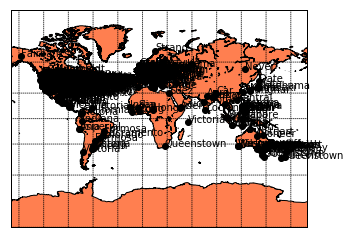

In [127]:
map = Basemap(projection='mill', lat_0=20, lon_0=20, resolution='l', area_thresh=1000.)

xs, ys = map(longitudes, latitudes)
map.plot(xs, ys, 'ko')

for x, y, name in zip(xs, ys, names):
    plt.text(x + 10 ** 4, y + 10 ** 4, name)

map.drawcoastlines()
map.drawcounties()
map.fillcontinents(color = 'coral')
map.drawmapboundary()
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))
plt.savefig(fname='map1.png')
plt.show()

In [37]:
from ipyleaflet import Map, basemaps, basemap_to_tiles, Rectangle

# center = (52.204793, 360.121558)

watercolor = basemap_to_tiles(basemaps.Stamen.Watercolor)

m = Map(layers=(watercolor, ), center=(0, 0), zoom=2)


# m = Map(center=center, zoom=0)

for x, y, name in zip(latitudes, longitudes, names):
    marker = Marker(location=(x, y), draggable=False, title=name)
    m.add_layer(marker)
    
    
# marker = Marker(location=center, draggable=False)
# m.add_layer(marker);

m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …